# **Data Preprocessing**

In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import io
%matplotlib inline

In [57]:
data = pd.read_csv('hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [58]:
# Display Column Name, Non-Null Count, Dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [59]:
# Display null count
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [60]:
# Drop Column with Maximum Null Count
data = data.drop('company', axis = 1)

In [ ]:
# Fill Null Column with Default Values
data = data.fillna({'children' : 0,
                    'agent'    : 0,
                    'country'  : 'Unknown',
})

In [61]:
# Check any existing null cells
any(data.isna().sum())

True

In [63]:
# Drop rows with with 0 guests
zero_guests = list(data.loc[data["adults"] + data["children"] + data["babies"]==0].index)
data.drop(data.index[zero_guests], inplace=True)

# **Exploratory Data Analysis(EDA)**

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119206 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

## **Detecting and Removing Outliers**

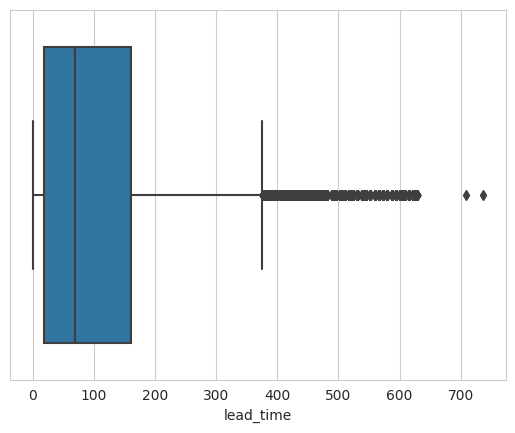

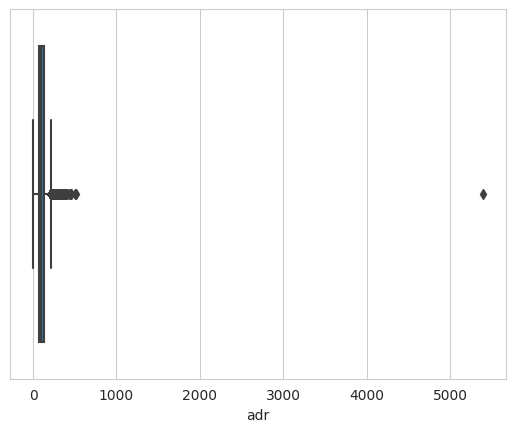

In [69]:
# lead_time is the difference between entering date and arrival date
sns.boxplot(data=data, x = 'lead_time')
plt.show()

# Average Daily Rate(adr)
sns.boxplot(data=data, x ='adr')
plt.show()

In [70]:
# Interquartile Range of lead time
IQR_lt = data['lead_time'].quantile(0.75) -  data['lead_time'].quantile(0.25)
IQR_adr = data['adr'].quantile(0.75) -  data['adr'].quantile(0.25)

# Applying the 1.5 rule and remove the outliers
temp1 = data['lead_time'].quantile(0.75) + 1.5*IQR_lt
temp2 = data['adr'].quantile(0.75) + 1.5*IQR_adr

# new data with no outliers
data_clean = data[data['lead_time'] <= temp1]
data_clean = data_clean[data_clean['adr'] <= temp2]

In [72]:
# Guest Count wrt Country

dt_country = pd.DataFrame(data.loc[data['is_canceled'] != 1]['country'].value_counts())
dt_country.index.name = 'country'

dt_country.rename(columns={"country": "Number of Guests"}, inplace=True)

number_of_guests = dt_country["Number of Guests"].sum()

dt_country["Guests in %"] = round(dt_country["Number of Guests"] / number_of_guests * 100, 2)

dt_country.head(10)

,Number of Guests,Guests in %
country,,
PRT,20977,28.12
GBR,9668,12.96
FRA,8468,11.35
ESP,6383,8.56
DEU,6067,8.13
IRL,2542,3.41
ITA,2428,3.26
BEL,1868,2.50
NLD,1716,2.30


In [73]:
import plotly.express as px
guest_map = px.choropleth(dt_country,
                    locations=dt_country.index,
                    color=dt_country["Guests in %"],
                    hover_name=dt_country.index,
                    title="Country of Origin of Guests")
guest_map.show()

## **Yearly Guest Count**

In [81]:
guest_data = data[data['is_canceled'] == 0].copy()
guests_monthly = guest_data[['hotel', 'arrival_date_year', 'arrival_date_month', 'adults', 'children', 'babies']].sort_values('arrival_date_year')
guests_monthly['total visitors'] = guests_monthly['adults'] + guests_monthly['children'] + guests_monthly['babies']
guests_monthly = guests_monthly.astype({'total visitors' : int})
guests_monthly = guests_monthly.drop(['adults', 'children', 'babies'], axis=1)


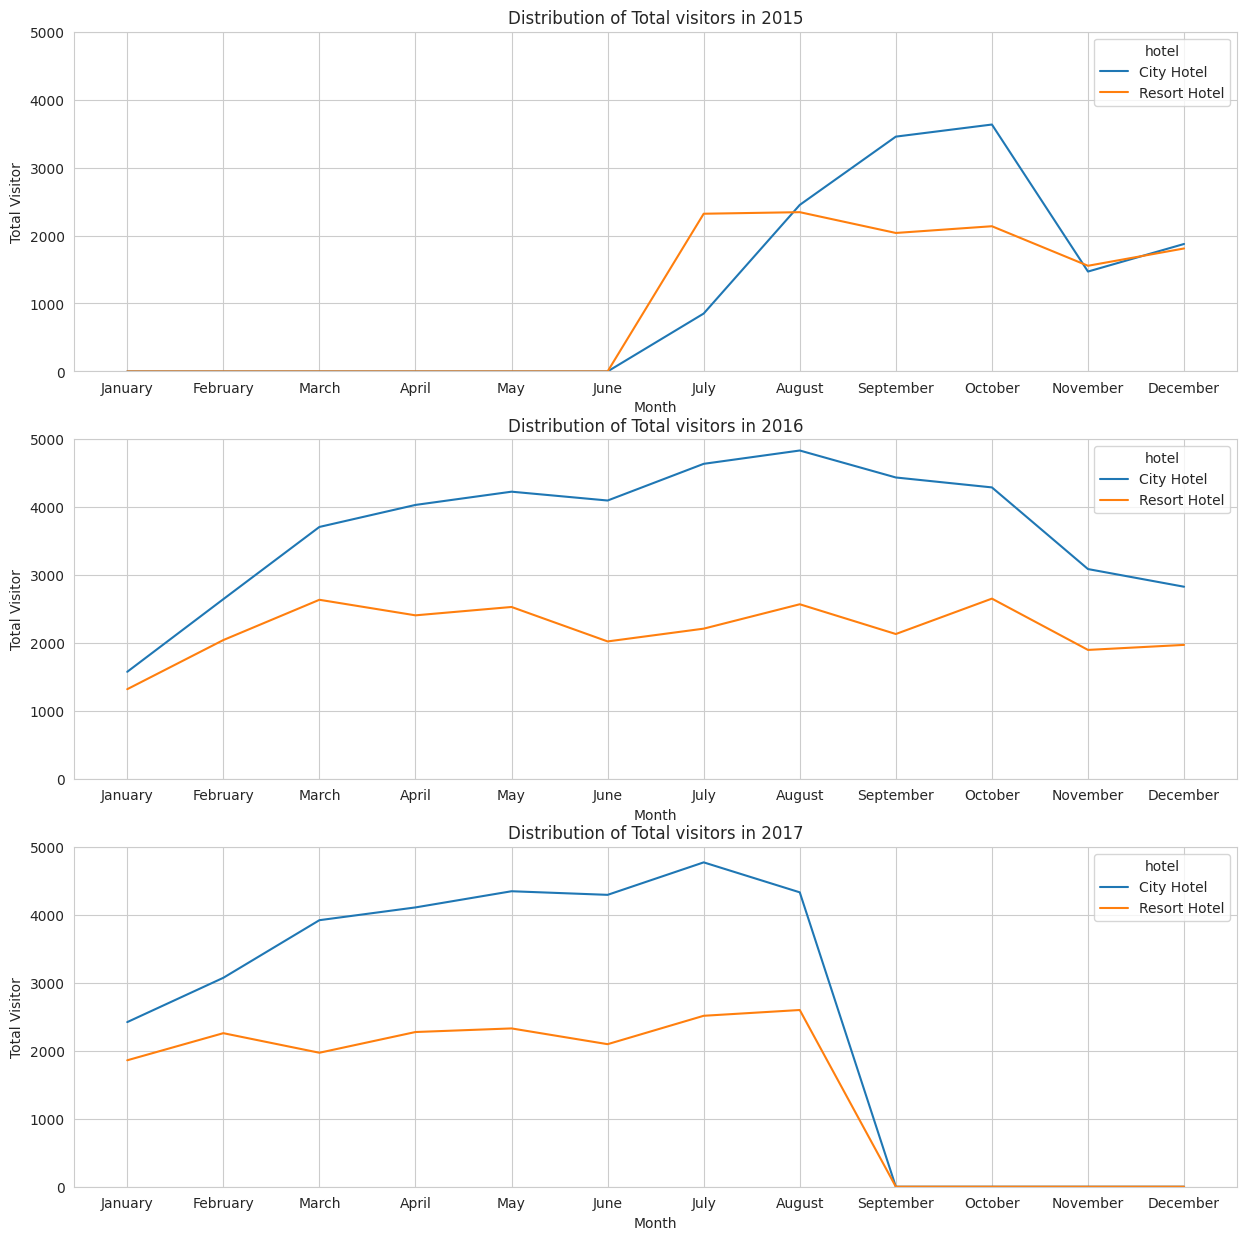

In [82]:
months_dict = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

guests_monthly['arrival_date_month'] = pd.Categorical(guests_monthly['arrival_date_month'], categories=months_dict, ordered=True)

guests_monthly = guests_monthly.groupby(['hotel', 'arrival_date_year', 'arrival_date_month'], as_index = False).sum()
f, ax = plt.subplots(3,1,figsize=(15,15))
sns.lineplot(x = 'arrival_date_month', y="total visitors", hue="hotel", data=guests_monthly[guests_monthly['arrival_date_year'] == 2015], errorbar="sd", ax=ax[0])
sns.lineplot(x = 'arrival_date_month', y="total visitors", hue="hotel", data=guests_monthly[guests_monthly['arrival_date_year'] == 2016], errorbar="sd", ax=ax[1])
sns.lineplot(x = 'arrival_date_month', y="total visitors", hue="hotel", data=guests_monthly[guests_monthly['arrival_date_year'] == 2017], errorbar="sd", ax=ax[2])

ax[0].set(title="Distribution of Total visitors in 2015")
ax[0].set(xlabel="Month", ylabel="Total Visitor")
ax[0].set(ylim = (0,5000))

ax[1].set(title="Distribution of Total visitors in 2016")
ax[1].set(xlabel="Month", ylabel="Total Visitor")
ax[1].set(ylim = (0,5000))

ax[2].set(title="Distribution of Total visitors in 2017")
ax[2].set(xlabel="Month", ylabel="Total Visitor")
ax[2].set(ylim = (0,5000))

plt.show()

## **Total cost based on room type per night**

In [83]:
# Separate data based on room type
resort_hotel = data_clean[(data_clean['hotel'] == 'Resort Hotel') & (data_clean['is_canceled'] == 0)]
city_hotel   = data_clean[(data_clean['hotel'] == 'City Hotel')   & (data_clean['is_canceled'] == 0)]

resort_hotel['adr_pp'] = resort_hotel['adr'] / (resort_hotel['adults'] + resort_hotel['children'])
city_hotel['adr_pp']   = city_hotel['adr']   / (city_hotel['adults']   + city_hotel['children'])

### Average Cost per night

In [87]:
print(f"""
    Average price paid per person per night is:
    Resort Hotel: {resort_hotel['adr_pp'].mean():.2f} €
    City Hotel: {city_hotel['adr_pp'].mean():.2f} €"""
    )


    Average price paid per person per night is:
    Resort Hotel: 44.50 €
    City Hotel: 58.82 €


In [88]:
raw_data_copy = data.copy()
raw_data_copy = raw_data_copy.loc[raw_data_copy['is_canceled'] == 0]
raw_data_copy['adr_pp'] = raw_data_copy['adr'] / (raw_data_copy['adults'] + raw_data_copy['children'])
room_prices = raw_data_copy[['hotel', 'reserved_room_type', 'adr_pp']].sort_values("reserved_room_type")

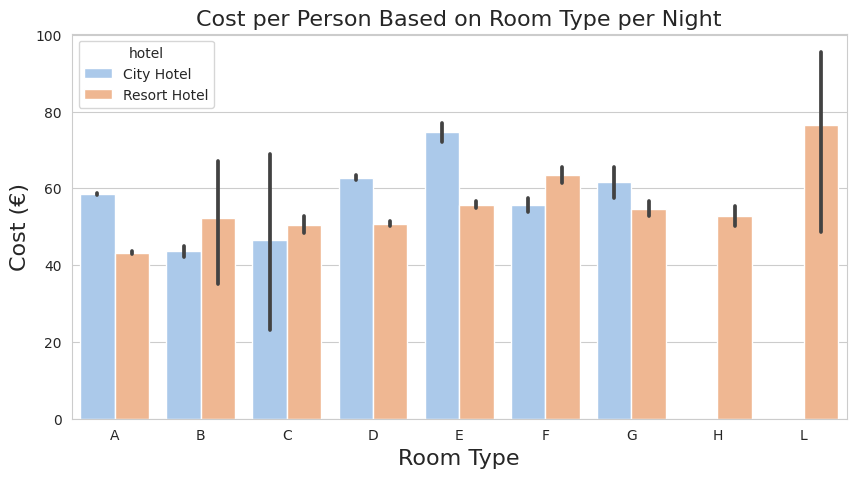

In [89]:
plt.figure(figsize=(10,5))
sns.barplot(x='reserved_room_type', y='adr_pp', hue='hotel', data=room_prices, hue_order=['City Hotel', 'Resort Hotel'], palette='pastel')
plt.title('Cost per Person Based on Room Type per Night', fontsize=16)
plt.xlabel('Room Type', fontsize = 16)
plt.ylabel('Cost (€)', fontsize = 16)
plt.show()

## **Most ordered Room Type**

In [ ]:
print('Booking Frequency for each Room Type in City Hotel')
print(data[(data['hotel'] == 'City Hotel')]['reserved_room_type'].value_counts())


print('------------------------------------------------------------------')


print('Booking Frequency for each Room Type in Resort Hotel')
print(data[data['hotel'] == 'Resort Hotel']['reserved_room_type'].value_counts())

Booking Frequency for each Room Type in City Hotel
A    62484
D    11747
F     1788
E     1537
B     1112
G      482
C       13
Name: reserved_room_type, dtype: int64
------------------------------------------------------------------
Booking Frequency for each Room Type in Resort Hotel
A    23389
D     7432
E     4982
G     1610
F     1106
C      918
H      601
L        6
B        3
Name: reserved_room_type, dtype: int64


<Axes: xlabel='reserved_room_type', ylabel='count'>

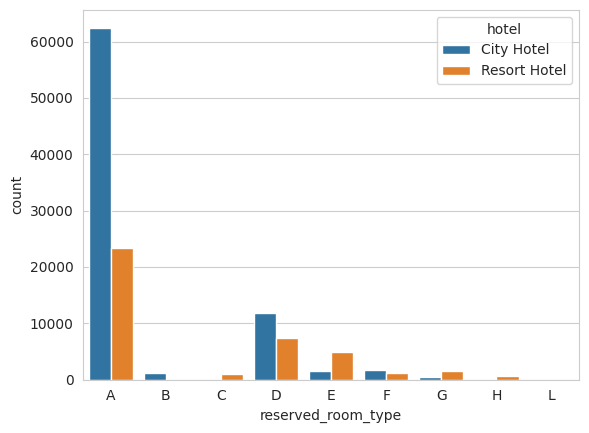

In [90]:
sns.countplot(x = 'reserved_room_type', data = data.sort_values('reserved_room_type'), hue='hotel')

## **Market Segment Comparison based on Hotel**

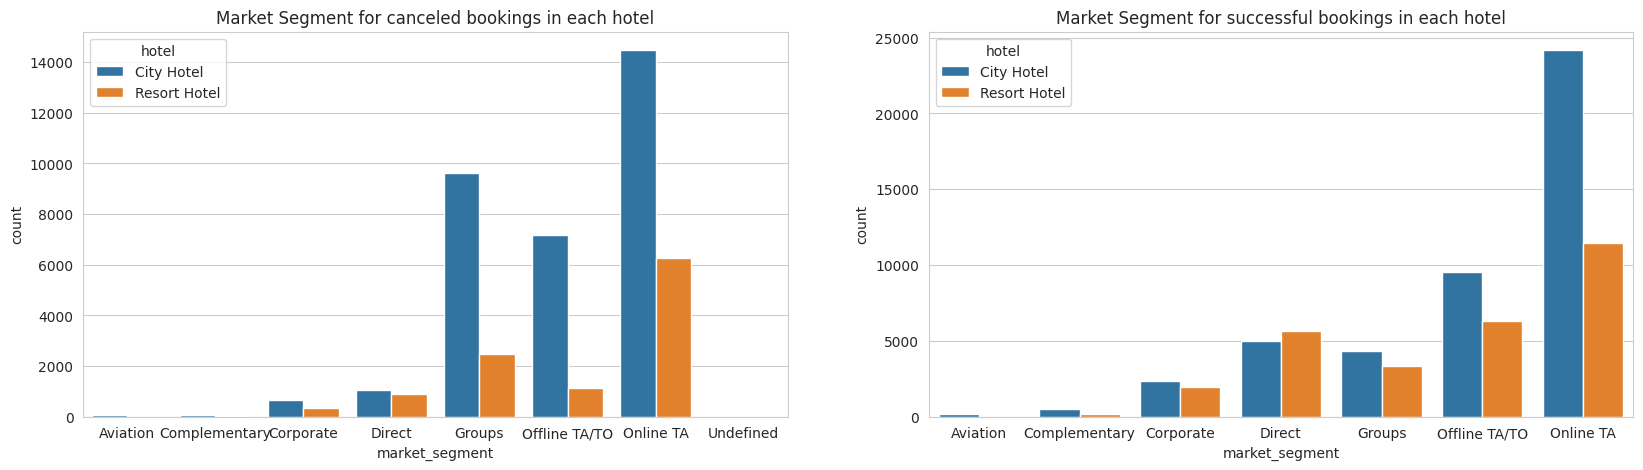

In [91]:
canceled = data[data['is_canceled'] == 1].sort_values('market_segment')
not_canceled = data[data['is_canceled'] == 0].sort_values('market_segment')
f, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(data=canceled, x= 'market_segment', hue='hotel', ax =ax[0])
sns.countplot(data=not_canceled, x= 'market_segment', hue='hotel', ax =ax[1])
ax[0].set(title='Market Segment for canceled bookings in each hotel')
ax[1].set(title='Market Segment for successful bookings in each hotel')
plt.show()

## **Investigating Correlation between all Features**

<ipython-input-92-1a22adb78f83>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

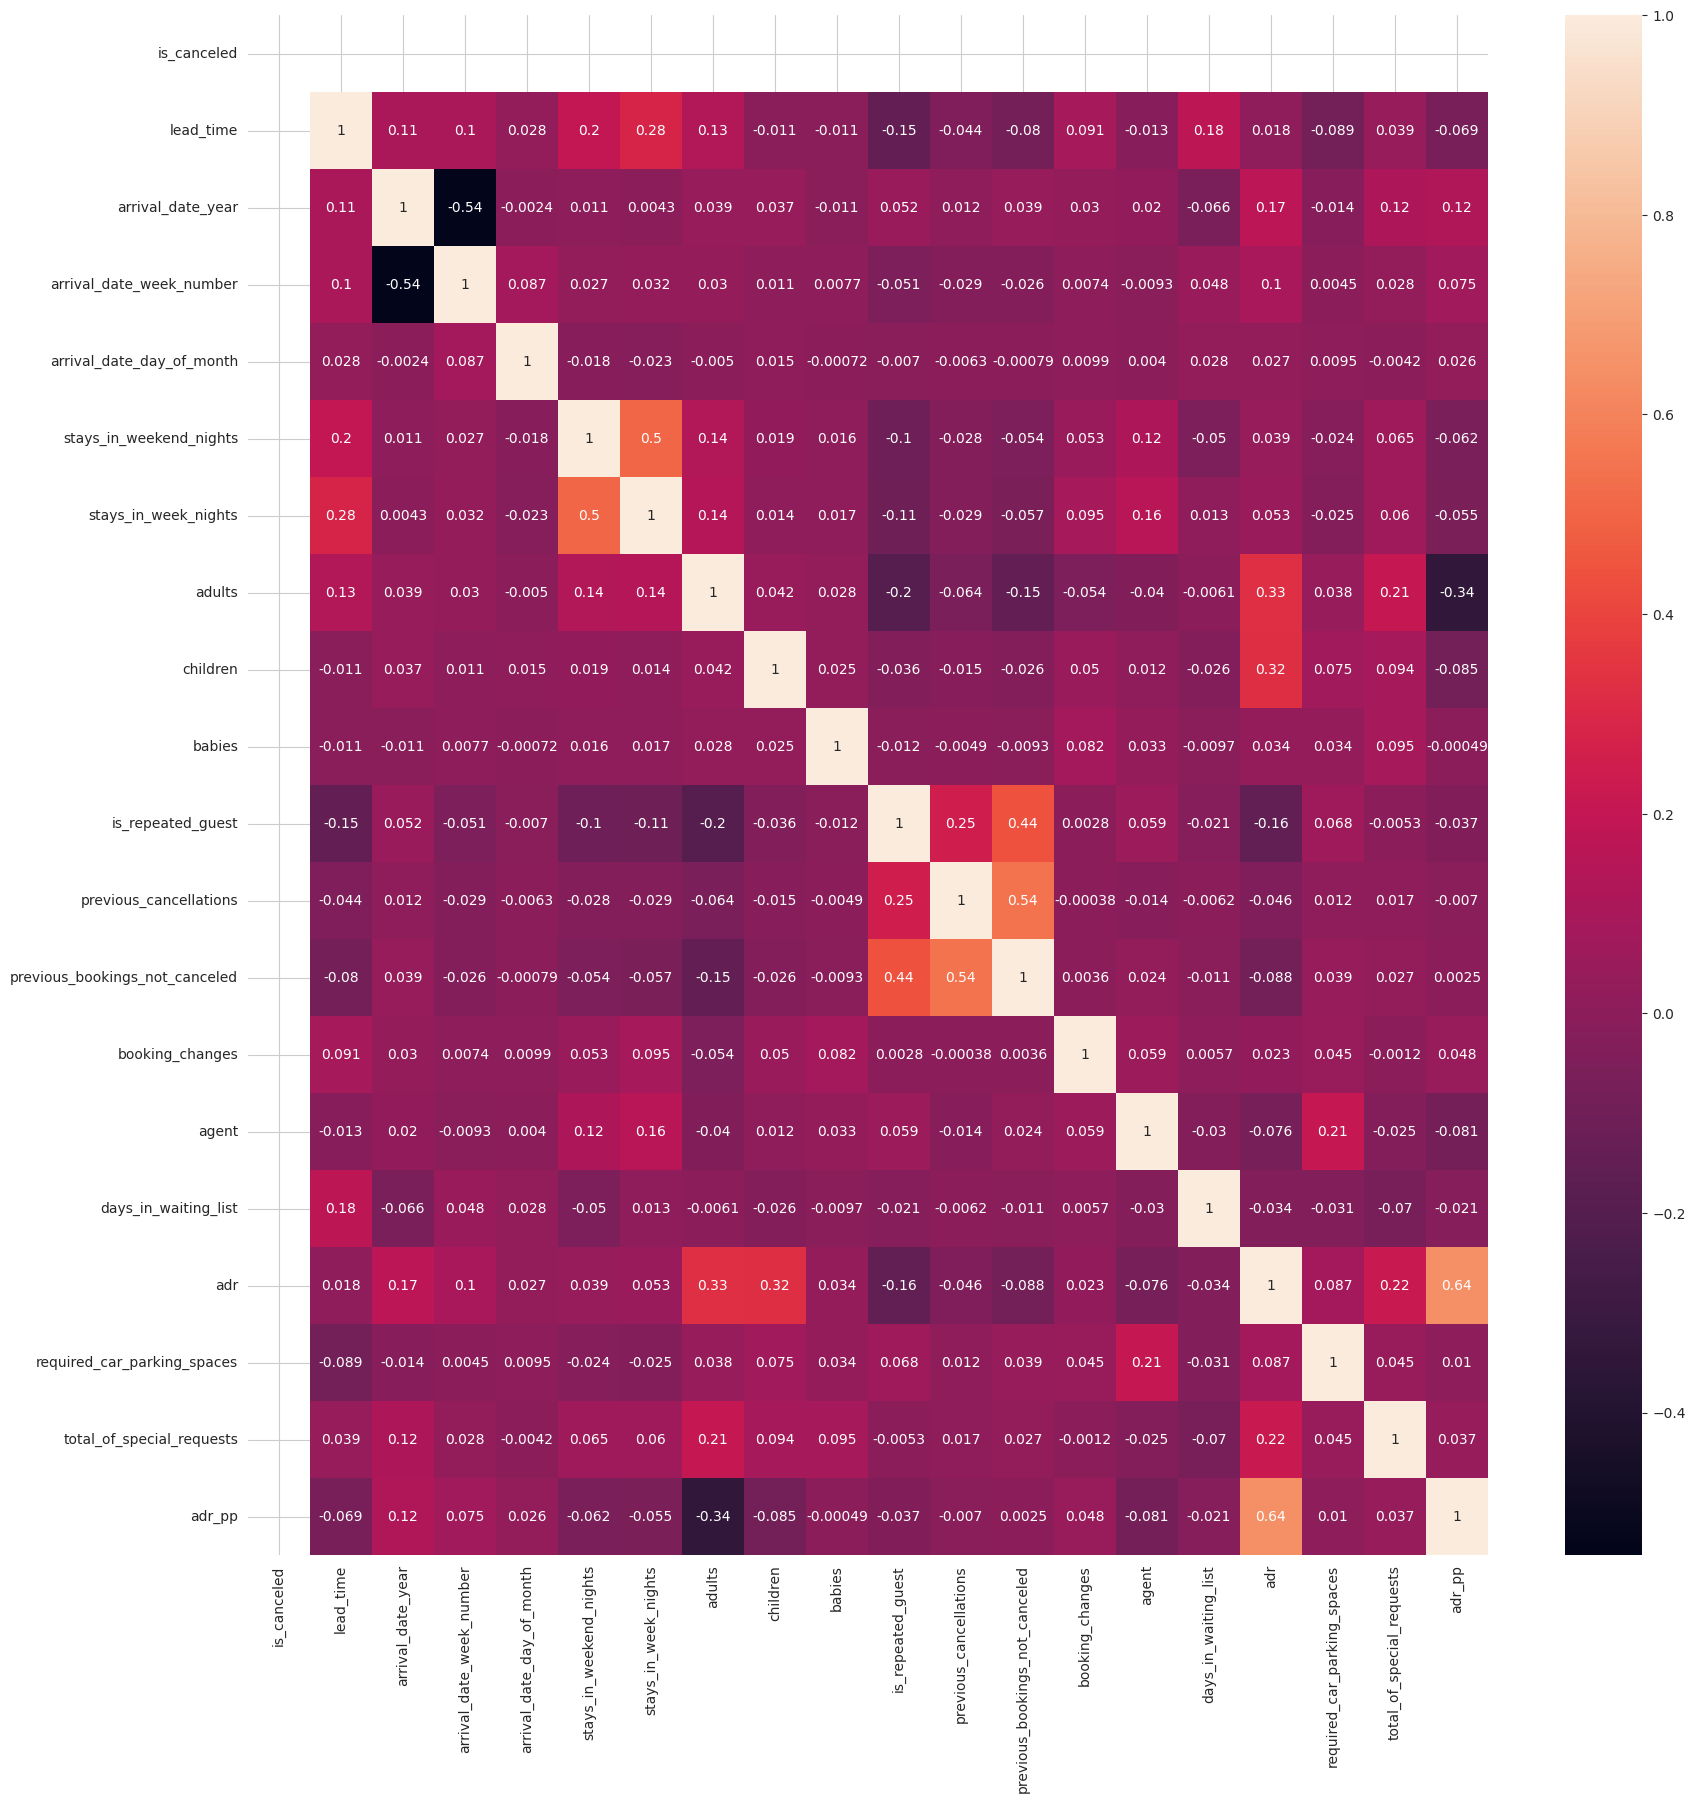

In [92]:
plt.figure(figsize=(20, 20))
sns.heatmap(raw_data_copy.corr(), annot=True)

## **Observing amounts of adult guests with children**

In [93]:
adult_no_child = data[(data['adults'] != 0) & (data['children'] == 0) & (data['babies'] == 0)].sort_values('reserved_room_type')
adult_child = data[(data['adults'] != 0) & (data['children'] != 0) | (data['babies'] != 0)].sort_values('reserved_room_type')

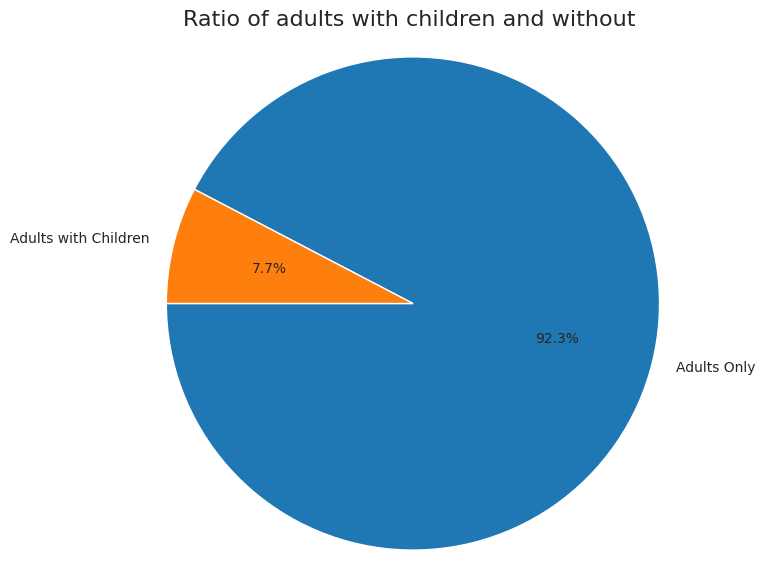

In [94]:
Ratios = [(len(adult_no_child)/(len(adult_no_child) + len(adult_child)))*100, (len(adult_child)/(len(adult_no_child) + len(adult_child)))*100]
labels = 'Adults Only', 'Adults with Children'

f, ax = plt.subplots(figsize=(7,7))
ax.pie(Ratios, labels = labels, autopct='%1.1f%%' , startangle = 180)
ax.axis('equal')

ax.set_title('Ratio of adults with children and without ', fontsize=16)
plt.show()

## **Total Cancellations in each months**

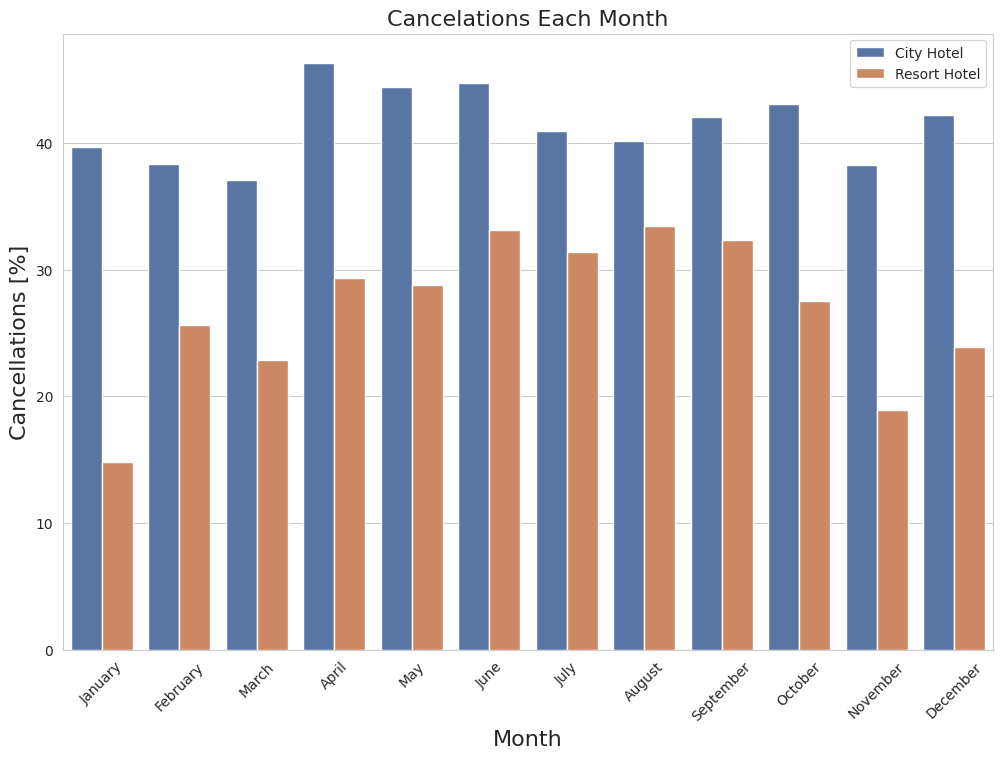

In [ ]:
resort_bookings = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
resort_booking_canceled = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

city_hotel_bookings = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
city_hotel_canceled_booking = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(resort_bookings.index),
                                "Bookings": list(resort_bookings.values),
                                "Cancelations": list(resort_booking_canceled.values)})

cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(city_hotel_bookings.index),
                                "Bookings": list(city_hotel_bookings.values),
                                "Cancelations": list(city_hotel_canceled_booking.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

ordered_months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data, palette = 'deep')
plt.title("Cancelations Each Month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancellations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

## **Booking cancellations based on Market Segment**

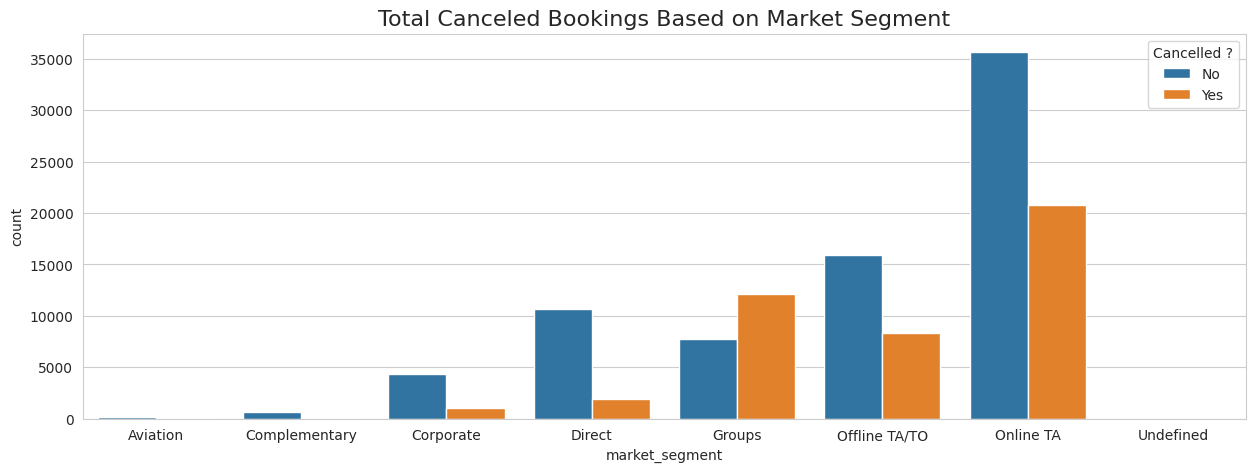

In [95]:
plt.figure(figsize=(15,5))
sns.countplot(x='market_segment', data=data.sort_values('market_segment'), hue = 'is_canceled')

plt.legend(title='Cancelled ?', loc='best', labels=['No', 'Yes'])
plt.title('Total Canceled Bookings Based on Market Segment', size = 16)
plt.show()

# **Machine Learning Modelling**

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier, plot_importance, DMatrix, train
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [113]:
train_data = pd.read_csv('hotel_bookings.csv')

In [114]:
empty_data = {"children:": 0.0,"country": "Unknown", "agent": 0, "company": 0}
train_data = train_data.fillna(empty_data)
train_data["meal"].replace("Undefined", "SC", inplace=True)

In [115]:
train_data = train_data.drop(['company'],axis=1)
train_data = train_data.dropna(axis=0)

## **Label Encoding**

### Converting feature datatypes to primitive.

In [116]:
train_data['hotel']=train_data['hotel'].map({'Resort Hotel':0,'City Hotel':1})
# arrival date
train_data['arrival_date_month'] = train_data['arrival_date_month'].map({'January':1,'February':2,'March':3,
                                                                'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10
                                                                ,'November':11,'December':12})


In [117]:
label_encoder = LabelEncoder()
train_data['meal']=label_encoder.fit_transform(train_data['meal'])
train_data['meal'].unique()

array([0, 1, 2, 3])

In [118]:
train_data['country']=label_encoder.fit_transform(train_data['country'])
train_data['market_segment']=label_encoder.fit_transform(train_data['market_segment'])
train_data['distribution_channel']=label_encoder.fit_transform(train_data['distribution_channel'])
train_data['reserved_room_type']=label_encoder.fit_transform(train_data['reserved_room_type'])
train_data['assigned_room_type']=label_encoder.fit_transform(train_data['assigned_room_type'])
train_data['deposit_type']=label_encoder.fit_transform(train_data['deposit_type'])
train_data['customer_type']=label_encoder.fit_transform(train_data['customer_type'])
train_data['reservation_status']=label_encoder.fit_transform(train_data['reservation_status'])
train_data['reservation_status_date']=label_encoder.fit_transform(train_data['reservation_status_date'])

In [119]:
train_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,7,27,1,0,0,2,...,3,0,0.0,0,2,0.0,0,0,1,668
1,0,0,737,2015,7,27,1,0,0,2,...,4,0,0.0,0,2,0.0,0,0,1,668
2,0,0,7,2015,7,27,1,0,1,1,...,0,0,0.0,0,2,75.0,0,0,1,701
3,0,0,13,2015,7,27,1,0,1,1,...,0,0,304.0,0,2,75.0,0,0,1,701
4,0,0,14,2015,7,27,1,0,2,2,...,0,0,240.0,0,2,98.0,0,1,1,734


## **Feature Extraction**

In [120]:
# Gathering feature through correlation coefficient
correlation=train_data.corr()['is_canceled']
correlation.abs().sort_values(ascending=False)

is_canceled                       1.000000
reservation_status                0.917191
deposit_type                      0.468665
lead_time                         0.293177
country                           0.264709
total_of_special_requests         0.234706
required_car_parking_spaces       0.195492
assigned_room_type                0.176025
distribution_channel              0.167544
booking_changes                   0.144371
reservation_status_date           0.143258
hotel                             0.136505
previous_cancellations            0.110140
is_repeated_guest                 0.084788
customer_type                     0.068210
reserved_room_type                0.061284
adults                            0.059990
market_segment                    0.059314
previous_bookings_not_canceled    0.057355
days_in_waiting_list              0.054193
adr                               0.047622
agent                             0.046503
babies                            0.032488
stays_in_we

In [121]:
columns=['arrival_date_day_of_month','children', 'arrival_date_week_number','stays_in_week_nights','reservation_status']
train_data=train_data.drop(columns,axis=1)
train_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,adults,babies,meal,country,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,0,0,342,2015,7,0,2,0,0,135,...,2,3,0,0.0,0,2,0.0,0,0,668
1,0,0,737,2015,7,0,2,0,0,135,...,2,4,0,0.0,0,2,0.0,0,0,668
2,0,0,7,2015,7,0,1,0,0,59,...,2,0,0,0.0,0,2,75.0,0,0,701
3,0,0,13,2015,7,0,1,0,0,59,...,0,0,0,304.0,0,2,75.0,0,0,701
4,0,0,14,2015,7,0,2,0,0,59,...,0,0,0,240.0,0,2,98.0,0,1,734


## **Building Linear Regression Model**

In [122]:
y=train_data['is_canceled'].values
x=train_data.drop(['is_canceled'],axis=1).values

In [145]:
# Split dataset
train_size = 0.8
test_size = 0.2
seed = 3

train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=train_size,test_size=test_size,random_state=seed)

In [146]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

regr.fit(train_x,train_y)

y_pred = regr.predict(test_x)
print('Train Score: ', regr.score(train_x, train_y))
print('Test Score: ', regr.score(test_x, test_y))

Train Score:  0.3635616289166015
Test Score:  0.36291334839768463
